In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', font_scale=1.3)

In [219]:
Ns = np.logspace(3, 7, 10).astype(int).tolist()
Q = 3
cache_sizes = [32*1024, 512*1024, 16*1024*1024]
cache_labels = ['32Kb', '512Kb', '16Mb']
heap_label = dict([
    ('stl_heap', 'stl'),
    ('simple_heap', 'prefetch'),
    ('dheap', 'd-ary'),
    ('simd_heap', 'simd'),
])

def plot_latency(heaps):
    plt.figure(figsize=(10, 8))
    
    all_values = []
    checksums = []
    for heap in heaps:
        !make {heap}
        values = []
        for N in Ns:
            res = !./{heap} {N} {Q}
            values += [float(res[1].split(': ')[1])]
            checksums += [float(res[0].split(': ')[1])]
        all_values += [values]
        plt.plot(Ns, values, label=heap_label[heap], lw=2)
        
    for cs, cl in zip(cache_sizes, cache_labels):
        plt.axvline(cs / 4, color='black', ls='--')
        plt.text(cs / 4 * 1.1 , 25, cl)
        
    plt.title('Сравнение производительности различных куч')
    plt.xlabel('Число элементов')
    plt.ylabel('query latency (ns)')
    plt.legend(loc=0)
    plt.xscale('log')
    plt.savefig("latency.svg")
    plt.show()
    
    assert len(set(checksums)) == len(Ns)

make: 'stl_heap' is up to date.
make: 'simple_heap' is up to date.
clang++ -std=c++17 -O3 -march=native dheap.cpp main.cpp -o dheap 
make: 'simd_heap' is up to date.


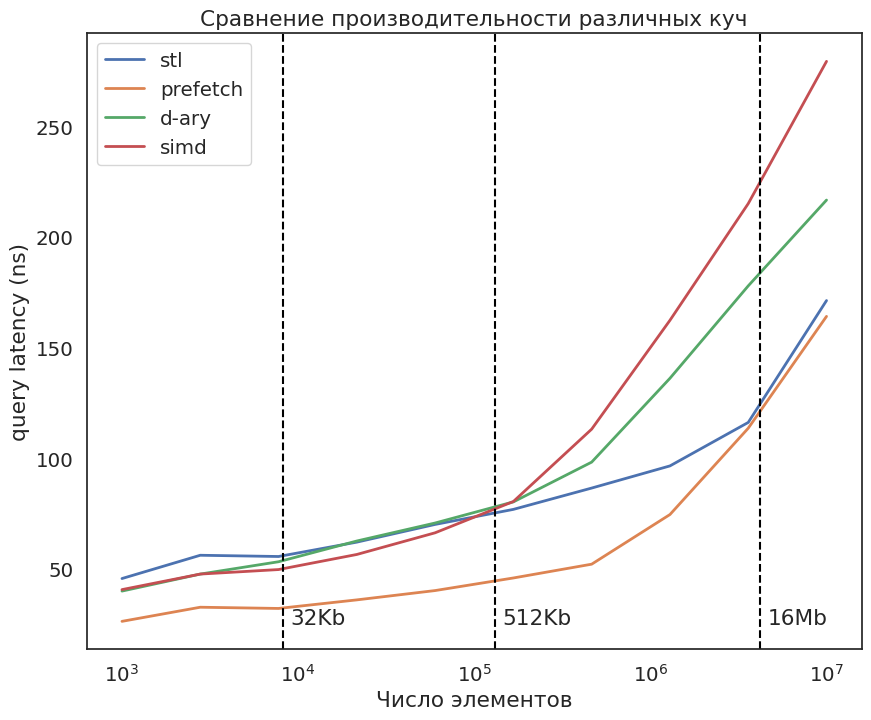

In [223]:
plot_latency(['stl_heap', 'simple_heap', 'dheap', 'simd_heap'])